## Курсовой проект для курса "Python для Data Science"

###### Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.5)  
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

###### Пути к директориям и файлам

In [3]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

### Загрузка данных

###### Описание датасета:
Id - идентификационный номер квартиры  
DistrictId - идентификационный номер района  
Rooms - количество комнат  
Square - площадь  
LifeSquare - жилая площадь  
KitchenSquare - площадь кухни  
Floor - этаж  
HouseFloor - количество этажей в доме  
HouseYear - год постройки дома  
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности  
Social_1, Social_2, Social_3 - социальные показатели местности  
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья  
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров  
Price - цена квартиры  

In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,nan,0,11,B,"184,966.93"
1,15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,"300,009.45"
2,4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,"220,925.91"
3,5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B,"175,616.23"
4,10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,"2,078.00",2,4,B,"150,226.53"


In [5]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,nan,0,0,B
1,15856,74,2.00,69.26,nan,1.00,6,1.00,1977,0.08,B,B,6,1437,3,nan,0,2,B
2,5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,"4,702.00",5,5,B
3,15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,nan,3,3,B
4,14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,nan,0,0,A


In [6]:
df_train.shape, df_test.shape

((10000, 20), (5000, 19))

### Получение информации о данных

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

###### Целевая переменная

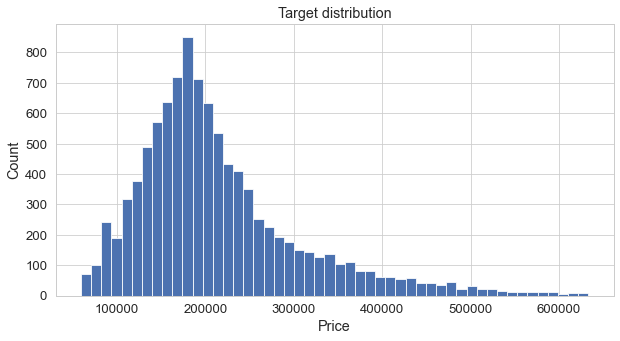

In [9]:
plt.figure(figsize = (10, 5))

df_train['Price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution');

###### Количественные переменные

In [10]:
df_train.nunique()

Id               10000
DistrictId         205
Rooms                9
Square           10000
LifeSquare        7887
KitchenSquare       58
Floor               33
HouseFloor          44
HouseYear           97
Ecology_1          129
Ecology_2            2
Ecology_3            2
Social_1            51
Social_2           142
Social_3            30
Healthcare_1        79
Helthcare_2          7
Shops_1             16
Shops_2              2
Price            10000
dtype: int64

In [11]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,"10,000.00","10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00"
mean,"8,383.41",50.40,1.89,56.32,37.20,6.27,8.53,12.61,"3,990.17",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86"
std,"4,859.02",43.59,0.84,21.06,86.24,28.56,5.24,6.78,"200,500.26",0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29"
min,0.00,0.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78"
25%,"4,169.50",20.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63"
50%,"8,394.50",36.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64"
75%,"12,592.50",75.00,2.00,65.90,45.13,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46"
max,"16,798.00",209.00,19.00,641.07,"7,480.59","2,014.00",42.00,117.00,"20,052,011.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47"


In [12]:
num_feature_names = df_train.drop('Price', axis=1).select_dtypes(include=['float64', 'int64'])\
        .drop(['Id', 'DistrictId'], axis=1).columns.tolist()
num_feature_names

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

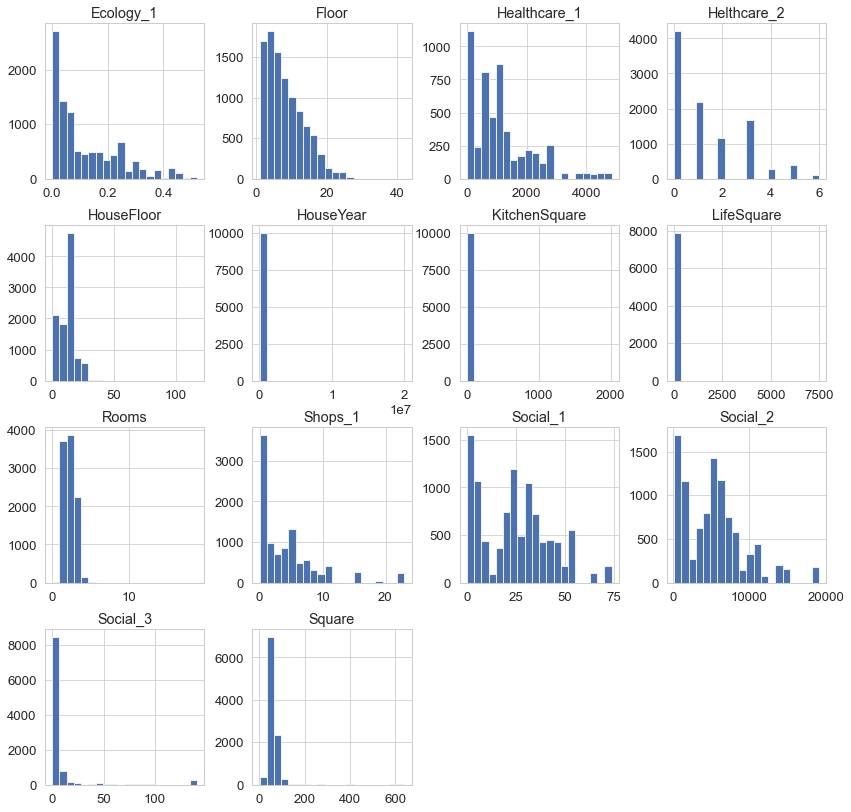

In [13]:
df_train[num_feature_names].hist(figsize=(14,14), bins=20, grid=True);

###### Категориальные переменные

In [14]:
cat_feature_names = df_train.select_dtypes(include='object').columns.tolist()
cat_feature_names

['Ecology_2', 'Ecology_3', 'Shops_2']

In [15]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [16]:
df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [17]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [18]:
df_train[cat_feature_names] = df_train[cat_feature_names].replace({'A':0, 'B':1})
df_test[cat_feature_names] = df_test[cat_feature_names].replace({'A':0, 'B':1})

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### Обработка пропусков

In [19]:
df_train.isna().sum()[df_train.isna().sum() != 0]

LifeSquare      2113
Healthcare_1    4798
dtype: int64

###### LifeSquare

In [20]:
mean_square_train = df_train[['Square', 'LifeSquare']].dropna().mean()

mean_square_train

Square       55.23
LifeSquare   37.20
dtype: float64

In [21]:
mean_square_test = df_test[['Square', 'LifeSquare']].dropna().mean()

mean_square_test

Square       55.40
LifeSquare   36.16
dtype: float64

In [22]:
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['Square'] * mean_square_train[1] / mean_square_train[0]
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = df_test['Square'] * mean_square_test[1] / mean_square_test[0]

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

###### Healthcare_1

In [24]:
df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].median(), inplace=True)
df_test['Healthcare_1'].fillna(df_test['Healthcare_1'].median(), inplace=True)

### Обработка выбросов

###### Rooms

In [25]:
df_train['Rooms'].value_counts()

2.00     3880
1.00     3705
3.00     2235
4.00      150
5.00       18
0.00        8
10.00       2
19.00       1
6.00        1
Name: Rooms, dtype: int64

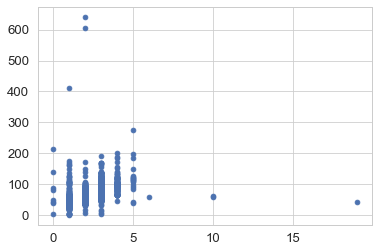

In [26]:
plt.scatter(df_train['Rooms'], df_train['Square']);

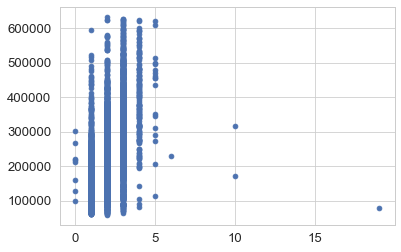

In [27]:
plt.scatter(df_train['Rooms'], df_train['Price']);

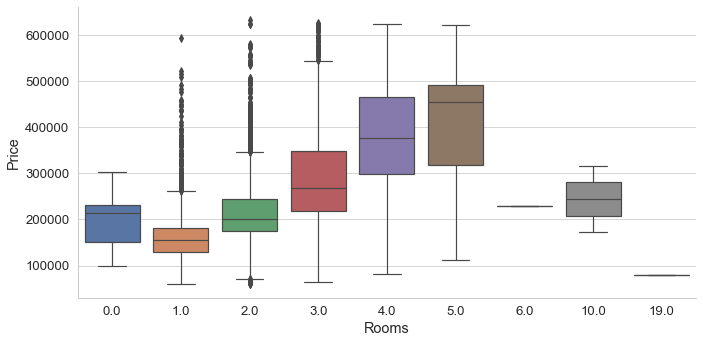

In [28]:
sns.catplot('Rooms', 'Price', kind="box", data=df_train, aspect=2/1);

In [29]:
df_train.loc[(df_train['Rooms'] > 5)|(df_train['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].median()
df_test.loc[(df_test['Rooms'] > 5)|(df_test['Rooms'] == 0), 'Rooms'] = df_test['Rooms'].median()

###### Square, LifeSquare, KitchenSquare

In [30]:
df_train['KitchenSquare'].value_counts()

1.00      2460
8.00      1306
5.00      1169
10.00     1075
6.00      1038
          ... 
73.00        1
123.00       1
31.00        1
53.00        1
54.00        1
Name: KitchenSquare, Length: 58, dtype: int64

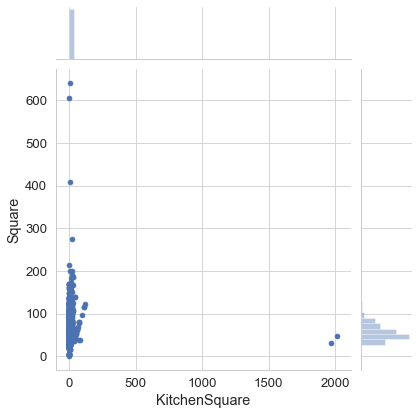

In [31]:
sns.jointplot(df_train['KitchenSquare'], df_train['Square'], kind='scatter', height=6);

In [32]:
df_train.loc[(df_train['KitchenSquare'] > df_train['Square'] * 0.5), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.00,79.72,44.73,72.00,12,16.00,1987,0.13,1,1,39,10418,9,900.00,1,9,1,"370,148.63"
551,1315,6,1.00,48.13,45.02,48.00,21,1.00,2013,0.24,1,1,5,1564,0,540.00,0,0,1,"146,950.91"
1064,14656,62,1.00,47.10,46.45,"2,014.00",4,1.00,2014,0.07,1,1,2,629,1,900.00,0,0,0,"108,337.48"
1077,9690,27,1.00,40.08,37.83,37.00,18,19.00,2019,0.21,1,1,9,1892,0,900.00,0,1,1,"93,218.65"
1369,2371,27,2.00,68.84,64.23,66.00,4,2.00,2014,0.02,1,1,2,469,0,900.00,0,0,1,"189,244.25"
1455,12507,54,2.00,79.81,79.58,78.00,10,15.00,2014,0.01,1,1,30,5285,0,645.00,6,6,1,"438,708.71"
1860,4265,161,2.00,53.22,32.64,53.00,7,17.00,1994,0.00,1,1,14,3369,24,"4,129.00",0,3,1,"261,125.67"
2916,12390,72,3.00,97.49,99.32,96.00,22,25.00,2019,0.21,1,1,11,2398,2,"1,994.00",3,0,1,"445,074.96"
2969,7441,62,3.00,114.73,112.59,112.00,3,3.00,2015,0.07,1,1,2,629,1,900.00,0,0,0,"315,245.52"
3379,16781,27,1.00,36.14,36.71,36.00,19,19.00,2017,0.07,1,1,2,629,1,900.00,0,0,0,"131,742.54"


In [33]:
df_train.loc[(df_train['KitchenSquare'] > df_train['Square'] * 0.5),
             'KitchenSquare'] = df_train['KitchenSquare'].median()
df_train.loc[df_train['KitchenSquare'] < 3, 'KitchenSquare'] = 3

df_test.loc[(df_test['KitchenSquare'] > df_test['Square'] * 0.5),
             'KitchenSquare'] = df_test['KitchenSquare'].median()
df_test.loc[df_test['KitchenSquare'] < 3, 'KitchenSquare'] = 3

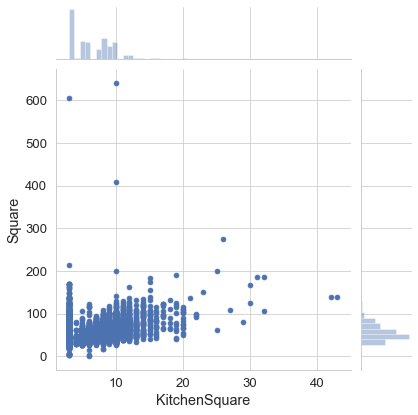

In [34]:
sns.jointplot(df_train['KitchenSquare'], df_train['Square'], kind='scatter', height=6);

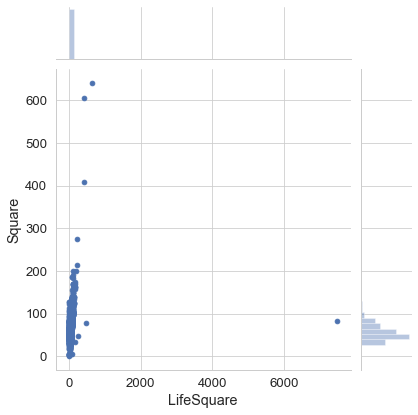

In [35]:
sns.jointplot(df_train['LifeSquare'], df_train['Square'], kind='scatter', height=6);

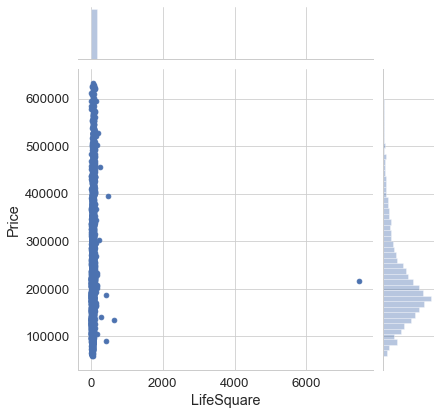

In [36]:
sns.jointplot(df_train['LifeSquare'], df_train['Price'], kind='scatter', height=6);

In [37]:
df_train.loc[(df_train['LifeSquare'] > 400), 'LifeSquare'] = \
        df_train['LifeSquare'].median()
df_test.loc[(df_test['LifeSquare'] > 400), 'LifeSquare'] = \
        df_train['LifeSquare'].median()

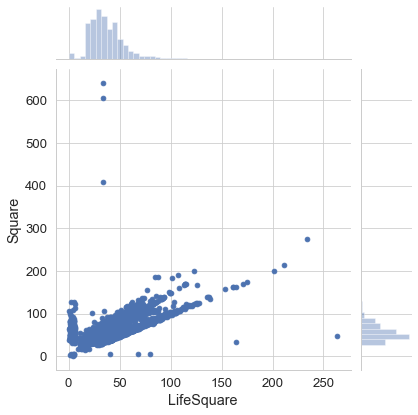

In [38]:
sns.jointplot(df_train['LifeSquare'], df_train['Square'], kind='scatter', height=6);

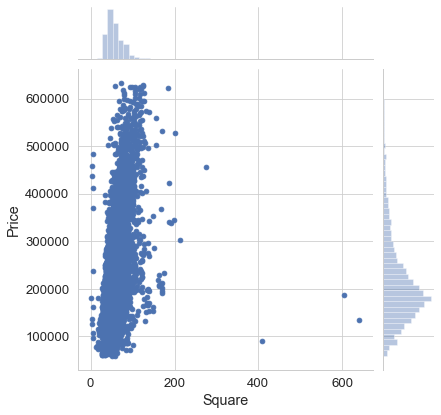

In [39]:
sns.jointplot(df_train['Square'], df_train['Price'], kind='scatter', height=6);

In [40]:
df_train.loc[(df_train['Square'] > 400) | (df_train['Square'] < 10), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.00,5.50,67.63,3.00,24,22.00,1977,0.13,1,1,43,8429,3,900.00,3,9,1,"412,511.09"
1316,11526,27,1.00,4.63,1.97,3.00,18,1.00,1977,0.01,1,1,4,915,0,900.00,0,0,1,"107,604.27"
1608,10202,6,1.00,2.60,4.60,3.00,3,25.00,2014,0.24,1,1,5,1564,0,540.00,0,0,1,"137,597.60"
3280,10527,27,1.00,4.38,40.81,3.00,10,17.00,2013,0.21,1,1,9,1892,0,900.00,0,1,1,"97,560.72"
3413,9487,5,1.00,5.13,5.55,3.00,1,1.00,1977,0.15,1,1,16,3433,4,"2,643.00",4,5,1,"369,472.40"
4262,28,9,2.00,604.71,33.63,3.00,17,18.00,1977,0.16,1,1,25,5648,1,30.00,2,4,1,"187,717.24"
4690,2307,102,1.00,409.43,33.63,10.00,4,4.00,2016,0.24,1,1,26,3889,6,705.00,3,6,1,"90,470.43"
4853,3224,27,2.00,2.38,0.87,3.00,1,0.00,1977,0.02,1,1,2,469,0,900.00,0,0,1,"126,596.94"
4900,4504,27,3.00,4.39,5.61,3.00,8,19.00,2016,0.21,1,1,9,1892,0,900.00,0,1,1,"161,379.07"
6392,14786,1,1.00,1.14,4.53,6.00,3,1.00,1977,0.01,1,1,1,264,0,900.00,0,1,1,"181,434.83"


In [41]:
df_train.loc[(df_train['Square'] > 400) | (df_train['Square'] < 10), 'Square'] = \
            df_train['Square'].median()

df_test.loc[(df_test['Square'] > 400) | (df_test['Square'] < 10), 'Square'] = \
            df_train['Square'].median()

In [42]:
df_train[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,"10,000.00","10,000.00","10,000.00"
mean,56.22,37.01,6.42
std,19.06,17.19,3.17
min,13.78,0.37,3.00
25%,41.79,24.84,3.00
50%,52.51,33.63,6.00
75%,65.89,45.33,9.00
max,275.65,263.54,43.00


In [43]:
df_train.loc[(df_train['LifeSquare'] > df_train['Square']) | (df_train['LifeSquare'] < 5), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.00,106.96,0.64,3.00,17,0.00,2018,0.07,1,1,2,629,1,900.00,0,0,0,"337,299.87"
28,8054,23,1.00,42.53,43.97,3.00,3,9.00,2014,0.03,1,1,0,168,0,900.00,0,0,1,"95,338.20"
44,10521,38,3.00,104.21,106.34,3.00,20,0.00,2017,0.06,1,1,15,2787,2,520.00,0,7,1,"435,462.05"
52,2301,1,2.00,61.40,65.22,3.00,17,22.00,2016,0.01,1,1,1,264,0,900.00,0,1,1,"199,215.45"
95,4280,34,2.00,61.33,4.09,3.00,26,1.00,2014,0.07,1,1,53,13670,4,900.00,1,11,1,"286,564.44"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9889,12918,23,2.00,51.44,53.13,6.00,3,17.00,2017,0.01,1,1,1,388,0,900.00,0,0,1,"88,150.01"
9895,2737,27,3.00,123.43,125.81,6.00,5,10.00,2015,0.02,1,1,2,469,0,900.00,0,0,1,"234,194.84"
9902,14001,73,1.00,44.10,44.27,3.00,7,24.00,2014,0.04,1,1,37,6856,84,"1,940.00",2,5,1,"381,937.40"
9910,16568,27,4.00,200.33,201.63,25.00,1,2.00,2013,0.04,1,1,53,14892,4,900.00,1,4,1,"528,560.51"


In [44]:
coeff_LSquare = (df_train['LifeSquare'] / df_train['Square']).mean()

coeff_LSquare

0.6530594438978207

In [45]:
df_train.loc[(df_train['LifeSquare'] > df_train['Square']) | (df_train['LifeSquare'] < 5), \
             'LifeSquare'] = df_train['Square'] * coeff_LSquare

df_test.loc[(df_test['LifeSquare'] > df_test['Square']) | (df_test['LifeSquare'] < 5), \
            'LifeSquare'] = df_test['Square'] * coeff_LSquare

In [46]:
df_train[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,"10,000.00","10,000.00","10,000.00"
mean,56.22,36.51,6.42
std,19.06,15.20,3.17
min,13.78,5.01,3.00
25%,41.79,25.42,3.00
50%,52.51,33.35,6.00
75%,65.89,44.76,9.00
max,275.65,233.95,43.00


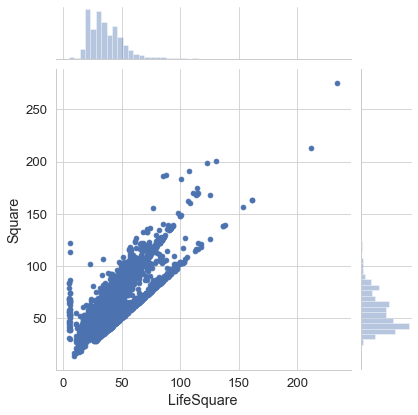

In [47]:
sns.jointplot(df_train['LifeSquare'], df_train['Square'], kind='scatter', height=6);

###### HouseFloor, Floor

In [48]:
df_train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [49]:
df_train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

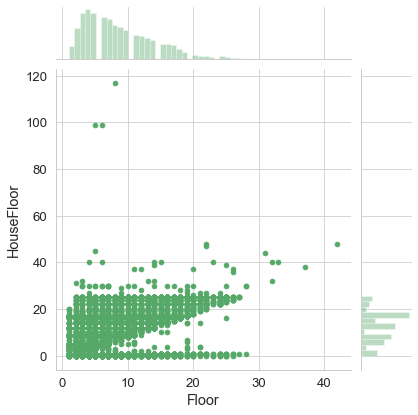

In [50]:
sns.jointplot(df_train['Floor'], df_train['HouseFloor'], kind='scatter', height=6, color='g');

In [51]:
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()

df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()

In [52]:
floor_outliers_train = df_train.loc[df_train['Floor'] > df_train['HouseFloor']].index
floor_outliers_test = df_test.loc[df_test['Floor'] > df_test['HouseFloor']].index

floor_outliers_train

Int64Index([   7,   14,   16,   21,   26,   35,   39,   44,   51,   67,
            ...
            9959, 9962, 9971, 9973, 9975, 9984, 9985, 9989, 9991, 9995],
           dtype='int64', length=1610)

In [53]:
df_train.loc[floor_outliers_train, 'Floor'] = \
    df_train.loc[floor_outliers_train, 'HouseFloor'].apply(lambda x: random.randint(1, x))

df_test.loc[floor_outliers_test, 'Floor'] = \
    df_test.loc[floor_outliers_test, 'HouseFloor'].apply(lambda x: random.randint(1, x))

###### HouseYear

In [54]:
df_train['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
1499        2020
5701        2020
7076        2020
          ...   
7611        1916
910         1914
5111        1912
2656        1912
9317        1910
Name: HouseYear, Length: 10000, dtype: int64

In [55]:
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

### Обработка редких категорий

###### DistrictId

In [56]:
print(df_train['DistrictId'].nunique(), ' уникальных  значений в train')
print(df_test['DistrictId'].nunique(), ' уникальных  значений в test')

205  уникальных  значений в train
201  уникальных  значений в test


In [57]:
district_size = df_train['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294
...,...,...
200,199,1
201,205,1
202,174,1
203,209,1


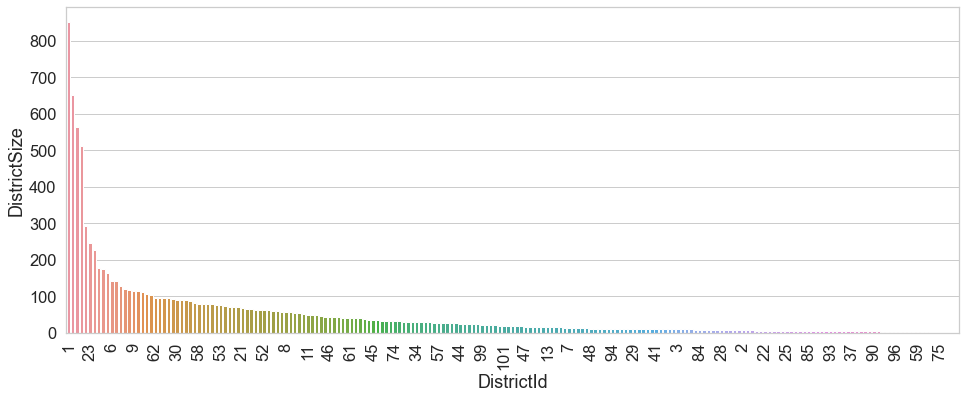

In [58]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y='DistrictSize', x='DistrictId', 
            data=district_size,
            order=district_size.sort_values(by='DistrictSize', ascending=False)['DistrictId']
           );
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [59]:
districts_popular = district_size.loc[district_size['DistrictSize'] > 100, 'DistrictId'].tolist()

In [60]:
district_size.loc[~district_size['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
district_size = district_size.groupby('DistrictId')['DistrictSize'].agg(
                            DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)
district_size

,DistrictId,DistrictSize
0,1,652
1,6,511
2,8,142
3,9,294
4,11,129
5,21,165
6,23,565
7,27,851
8,30,228
9,34,111


In [61]:
df_train.loc[~df_train['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
df_test.loc[~df_test['DistrictId'].isin(districts_popular), 'DistrictId'] = 999

In [62]:
df_train['DistrictId'].value_counts()

999    4931
27      851
1       652
23      565
6       511
9       294
62      247
30      228
58      179
53      174
21      165
52      143
8       142
11      129
46      119
61      118
45      116
74      114
34      111
57      107
44      104
Name: DistrictId, dtype: int64

### Построение новых признаков

###### DistrictSize

In [63]:
df_train = df_train.merge(district_size, on='DistrictId', how='left').set_index(df_train.index)
df_test = df_test.merge(district_size, on='DistrictId', how='left').set_index(df_test.index)

df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,14038,999,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,...,1,33,7976,5,900.00,0,11,1,"184,966.93",15
1,15053,999,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,...,1,46,10309,1,240.00,1,16,1,"300,009.45",15
2,4765,53,2.00,44.95,29.20,3.00,8,12.00,1968,0.05,...,1,34,7759,0,229.00,1,3,1,"220,925.91",174
3,5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,...,1,23,5735,3,"1,084.00",0,5,1,"175,616.23",179
4,10783,999,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,...,1,35,5776,1,"2,078.00",2,4,1,"150,226.53",15


###### PriceSquareMeter

In [64]:
df_train['PriceSquareMeter'] = df_train['Price'] / df_train['Square']

In [65]:
df_train['PriceSquareMeter'].describe()

count   10,000.00
mean     3,892.16
std      1,251.63
min        752.59
25%      2,917.33
50%      3,908.65
75%      4,690.65
max     11,854.65
Name: PriceSquareMeter, dtype: float64

###### PriceSquareMeterByDistrict

In [66]:
price_by_district = df_train.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceSquareMeter':'median'})\
                        .rename(columns={'PriceSquareMeter':'PriceSquareMeterByDistrict'})

price_by_district

,DistrictId,PriceSquareMeterByDistrict
0,1,"3,251.65"
1,6,"2,860.95"
2,8,"4,124.22"
3,9,"3,209.56"
4,11,"4,134.35"
5,21,"3,986.57"
6,23,"2,273.50"
7,27,"2,759.09"
8,30,"2,830.36"
9,34,"4,304.30"


In [67]:
df_train = df_train.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_test.index)

In [68]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,PriceSquareMeter,PriceSquareMeterByDistrict
0,14038,999,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,...,7976,5,900.00,0,11,1,"184,966.93",15,"3,854.96","4,491.57"
1,15053,999,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,...,10309,1,240.00,1,16,1,"300,009.45",15,"4,567.49","4,491.57"
2,4765,53,2.00,44.95,29.20,3.00,8,12.00,1968,0.05,...,7759,0,229.00,1,3,1,"220,925.91",174,"4,915.15","4,845.92"
3,5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,...,5735,3,"1,084.00",0,5,1,"175,616.23",179,"3,291.59","2,949.98"
4,10783,999,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,...,5776,1,"2,078.00",2,4,1,"150,226.53",15,"3,788.89","4,491.57"


###### FloorCategory

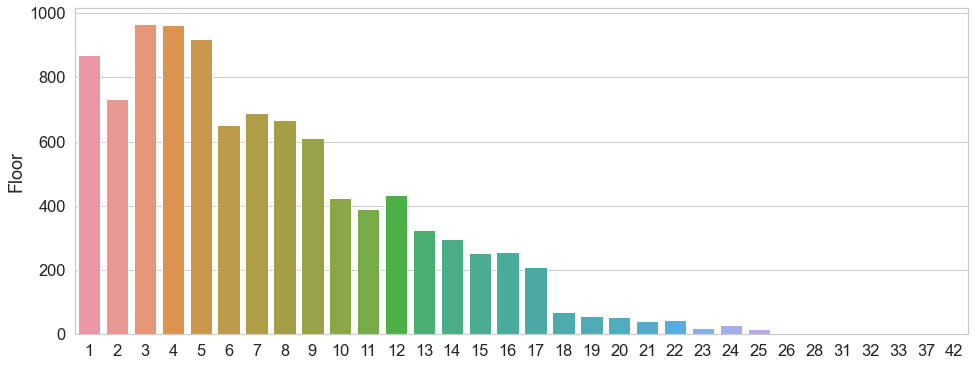

In [69]:
sns.set(style="whitegrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=df_train['Floor'].value_counts(), x=df_train['Floor'].value_counts().index);

In [70]:
df_train.loc[df_train['Floor'] <= 5, 'Floor_cat'] = 1  
df_train.loc[(df_train['Floor'] > 5) & (df_train['Floor'] <= 12), 'Floor_cat'] = 2
df_train.loc[(df_train['Floor'] > 12) & (df_train['Floor'] <= 17), 'Floor_cat'] = 3
df_train.loc[df_train['Floor'] > 17, 'Floor_cat'] = 4

df_test.loc[df_test['Floor'] <= 5, 'Floor_cat'] = 1  
df_test.loc[(df_test['Floor'] > 5) & (df_test['Floor'] <= 12), 'Floor_cat'] = 2
df_test.loc[(df_test['Floor'] > 12) & (df_test['Floor'] <= 17), 'Floor_cat'] = 3
df_test.loc[df_test['Floor'] > 17, 'Floor_cat'] = 4

###### HouseFloorCategory

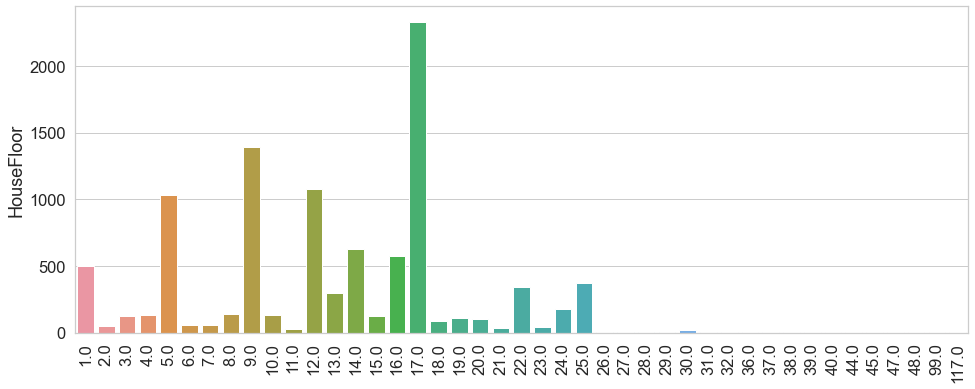

In [71]:
sns.set(style="whitegrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=df_train['HouseFloor'].value_counts(), x=df_train['HouseFloor'].value_counts().index);

ax.tick_params(axis='x', rotation=90)

In [72]:
df_train.loc[df_train['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
df_train.loc[(df_train['HouseFloor'] > 5) & (df_train['HouseFloor'] <= 12), 'HouseFloor_cat'] = 2
df_train.loc[(df_train['HouseFloor'] > 12) & (df_train['HouseFloor'] <= 17), 'HouseFloor_cat'] = 3
df_train.loc[df_train['HouseFloor'] > 17, 'HouseFloor_cat'] = 4

df_test.loc[df_test['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
df_test.loc[(df_test['HouseFloor'] > 5) & (df_test['HouseFloor'] <= 12), 'HouseFloor_cat'] = 2
df_test.loc[(df_test['HouseFloor'] > 12) & (df_test['HouseFloor'] <= 17), 'HouseFloor_cat'] = 3
df_test.loc[df_test['HouseFloor'] > 17, 'HouseFloor_cat'] = 4

In [73]:
df_train[['Floor_cat', 'HouseFloor_cat']] = df_train[['Floor_cat', 'HouseFloor_cat']].astype(int)
df_test[['Floor_cat', 'HouseFloor_cat']] = df_test[['Floor_cat', 'HouseFloor_cat']].astype(int)

df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,PriceSquareMeter,PriceSquareMeterByDistrict,Floor_cat,HouseFloor_cat
0,14038,999,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,...,900.00,0,11,1,"184,966.93",15,"3,854.96","4,491.57",2,2
1,15053,999,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,...,240.00,1,16,1,"300,009.45",15,"4,567.49","4,491.57",2,2
2,4765,53,2.00,44.95,29.20,3.00,8,12.00,1968,0.05,...,229.00,1,3,1,"220,925.91",174,"4,915.15","4,845.92",2,2
3,5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,...,"1,084.00",0,5,1,"175,616.23",179,"3,291.59","2,949.98",2,3
4,10783,999,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,...,"2,078.00",2,4,1,"150,226.53",15,"3,788.89","4,491.57",2,2


###### HouseYearCategory

In [74]:
df_train.loc[df_train['HouseYear'] <= 1950, 'HouseYear_cat'] = 1  
df_train.loc[(df_train['HouseYear'] > 1950) & (df_train['HouseYear'] <= 1970), 'HouseYear_cat'] = 2
df_train.loc[(df_train['HouseYear'] > 1970) & (df_train['HouseYear'] <= 1990), 'HouseYear_cat'] = 3
df_train.loc[(df_train['HouseYear'] > 1990) & (df_train['HouseYear'] <= 2010), 'HouseYear_cat'] = 4
df_train.loc[df_train['HouseYear'] > 2010, 'HouseYear_cat'] = 5

df_test.loc[df_test['HouseYear'] <= 1950, 'HouseYear_cat'] = 1  
df_test.loc[(df_test['HouseYear'] > 1950) & (df_test['HouseYear'] <= 1970), 'HouseYear_cat'] = 2
df_test.loc[(df_test['HouseYear'] > 1970) & (df_test['HouseYear'] <= 1990), 'HouseYear_cat'] = 3
df_test.loc[(df_test['HouseYear'] > 1990) & (df_test['HouseYear'] <= 2010), 'HouseYear_cat'] = 4
df_test.loc[df_test['HouseYear'] > 2010, 'HouseYear_cat'] = 5

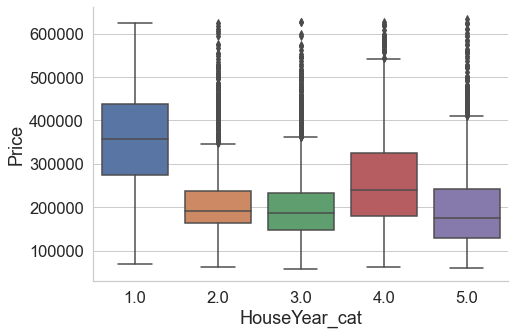

In [75]:
sns.catplot("HouseYear_cat", "Price", kind="box", data=df_train, aspect=3/2);

In [76]:
df_train['HouseYear_cat'] = df_train['HouseFloor_cat'].astype(int)
df_test['HouseYear_cat'] = df_test['HouseFloor_cat'].astype(int)

df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,PriceSquareMeter,PriceSquareMeterByDistrict,Floor_cat,HouseFloor_cat,HouseYear_cat
0,14038,999,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,...,0,11,1,"184,966.93",15,"3,854.96","4,491.57",2,2,2
1,15053,999,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,...,1,16,1,"300,009.45",15,"4,567.49","4,491.57",2,2,2
2,4765,53,2.00,44.95,29.20,3.00,8,12.00,1968,0.05,...,1,3,1,"220,925.91",174,"4,915.15","4,845.92",2,2,2
3,5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,...,0,5,1,"175,616.23",179,"3,291.59","2,949.98",2,3,3
4,10783,999,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,...,2,4,1,"150,226.53",15,"3,788.89","4,491.57",2,2,2


### Отбор признаков

In [77]:
df_train.to_csv('train_prepared.csv')
df_test.to_csv('test_prepared.csv')

In [78]:
feature_names = df_train.columns
feature_names.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'PriceSquareMeter',
 'PriceSquareMeterByDistrict',
 'Floor_cat',
 'HouseFloor_cat',
 'HouseYear_cat']

In [79]:
target_name = ['Price']
feature_names = [#'Id',
                 #'DistrictId',
                 'Rooms',
                 'Square',
    #             'LifeSquare',
                 'KitchenSquare',
                 'Floor',
                 'HouseFloor',
                 'HouseYear',
                 'Ecology_1',
             #    'Ecology_2',
             #    'Ecology_3',
                 'Social_1',
                 'Social_2',
                 'Social_3',
    #             'Healthcare_1',
                 'Helthcare_2',
    #             'Shops_1',
         #        'Shops_2',
                 #'Price',
                 'DistrictSize',
                 #'PriceSquareMeter',
                 'PriceSquareMeterByDistrict',
                 'Floor_cat',
                 'HouseFloor_cat',
                 'HouseYear_cat']

In [80]:
X = df_train[feature_names]
y = df_train[target_name]

X_test = df_test[feature_names]

In [81]:
len(feature_names)

16

### Построение модели Random Forest

###### Перекрестная проверка модели

In [82]:
forest = RandomForestRegressor(max_depth=18, 
                               max_features=6, 
                               n_estimators=100,
                               random_state=42)

In [83]:
cv_score = cross_val_score(forest, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=42))
cv_score

array([0.73228108, 0.73794593, 0.73883568, 0.73422885, 0.77901381])

In [84]:
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.74446


###### Важность признаков

In [85]:
forest.fit(X, y)
importances = forest.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

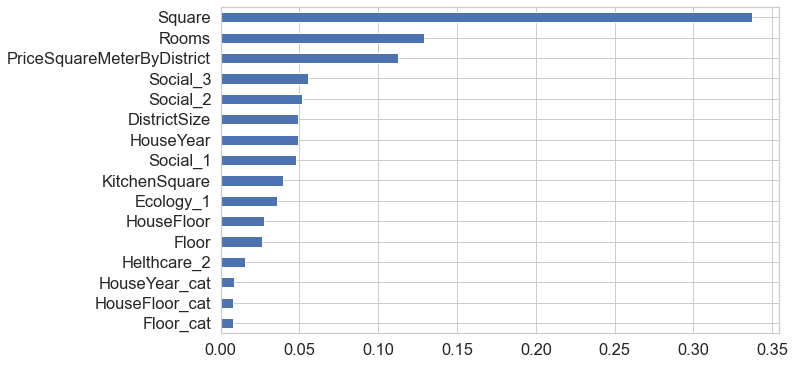

In [86]:
feat_importances.plot(kind='barh', figsize=(10, 6));

### Настройка гиперпараметров модели

In [87]:
params = {
    'n_estimators': [400],
    'max_depth': [17,18,19],
    'max_features': [5,6,7]
}

In [88]:
forest_grid = GridSearchCV(forest, params, scoring='r2', 
                  cv=KFold(n_splits=10, random_state=42, shuffle=True), 
                  n_jobs=-1)
forest_grid.fit(X, y)
print(forest_grid.best_params_)
print('R2 на train: {:.5f}'.format(forest_grid.best_score_))

{'max_depth': 17, 'max_features': 5, 'n_estimators': 400}
R2 на train: 0.74967


### Прогнозирование на тестовом датасете

In [89]:
forest_best = forest_grid.best_estimator_

y_pred = forest_best.predict(X_test)

In [90]:
preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred

preds.head()

,Id,Price
0,0,"160,880.12"
1,1,"227,845.61"
2,2,"222,317.42"
3,3,"344,363.77"
4,4,"147,578.03"


In [91]:
preds.to_csv('AGimchinskaya_predictions.csv', index=False)